In [3]:
import numpy as np
import time

In [4]:

# Choose weights! 
# Should I select the mean weights or the total biggest weights?
# Probably the mean? 

time_less_weights =[]
time_less_weights.append(time.time())



In [5]:
max_rounds = 5
number_of_parameters = 10
number_of_nodes = 3

In [39]:
weights = np.zeros((number_of_nodes, max_rounds, number_of_parameters))
weights[0][0][1] = 6
weights[0][2][4] = 2
weights[1][4][4] = 23
weights[2][2][4] = 4
weights[2][2][8] = 1
weights[0][2][7] = 14
weights[0][0][9] = 16
weights[1][2][0] = 18
weights[1][1][6] = 19
weights[1][0][1] = 20
weights[2][4][9] = 11
weights[2][3][1] = 12
weights[0][1][2] = 8
weights[1][1][4] = 27


print(weights.shape)
weights

(3, 5, 10)


array([[[ 0.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.],
        [ 0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  2.,  0.,  0., 14.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],

       [[ 0., 20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 27.,  0., 19.,  0.,  0.,  0.],
        [18.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 23.,  0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  1.,  0.],
        [ 0., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.]]])

In [40]:
´

SyntaxError: invalid character in identifier (<ipython-input-40-0fc415cc98d7>, line 1)

In [41]:
 # Get the mean
save_all_means = np.zeros((max_rounds, number_of_parameters))
for i in range (0, max_rounds):
    means_per_round = np.zeros((number_of_parameters))
    for j in range(0, number_of_parameters):
        sum_of_parameter = 0
        for k in range(0, number_of_nodes):
            sum_of_parameter += weights[k][i][j]
        sum_of_parameter /= number_of_nodes
        means_per_round[j] = sum_of_parameter
    save_all_means[i] = means_per_round

In [42]:
save_all_means

array([[0.        , 8.66666667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 5.33333333],
       [0.        , 0.        , 2.66666667, 0.        , 9.        ,
        0.        , 6.33333333, 0.        , 0.        , 0.        ],
       [6.        , 0.        , 0.        , 0.        , 2.        ,
        0.        , 0.        , 4.66666667, 0.33333333, 0.        ],
       [0.        , 4.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 7.66666667,
        0.        , 0.        , 0.        , 0.        , 3.66666667]])

In [43]:

time_less_weights.append(time.time())
print("We just got the means",  time_less_weights[1]-time_less_weights[0])

number_of_weights_concidered = 3
indicies_larges_weights = np.zeros((max_rounds,number_of_weights_concidered))

We just got the means 548.1385560035706


In [44]:
indicies_larges_weights

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [45]:
print("Len all means", len(save_all_means))
counter = 0
for row in range(len(save_all_means)):
    indicies_larges_weights[row] = save_all_means[row].argsort()[-3:][::-1] #second bracket turns out around
    counter += 1
    print("counter", counter)
    print(indicies_larges_weights[row])
#indicies_larges_weights = np.argpartition(save_all_means, -10)[-10:]



Len all means 5
counter 1
[1. 9. 8.]
counter 2
[4. 6. 2.]
counter 3
[0. 7. 4.]
counter 4
[1. 9. 8.]
counter 5
[4. 9. 8.]


In [46]:

print("Shape Indicies largest weights", indicies_larges_weights.shape)

time_less_weights.append(time.time()) #2
print("We just got the biggest indices", time_less_weights[2]-time_less_weights[1])


Shape Indicies largest weights (5, 3)
We just got the biggest indices 8.854238986968994


In [47]:
# Maybe I can do this for one round and then keep it for the next 15 rounds or so?
# maybe decide for global model which one to take?

array_with_mse = np.zeros((number_of_nodes, max_rounds, number_of_weights_concidered))
array_with_accum_mse = np.zeros((number_of_nodes, max_rounds))

# Get the mse for each node for each round and parameter
# sum all paramter mse per node together and give back one value
for i in range(0, max_rounds):
    for k in range(0, number_of_nodes):
        intermediate_sum = 0
        for j in range(0, len(indicies_larges_weights[0])):
            print(weights[k][i][int(indicies_larges_weights[i][j])])
            array_with_mse[k][i][j] = ((save_all_means[i][j] - weights[k][i][int(indicies_larges_weights[i][j])]) ** 2)
            intermediate_sum +=  array_with_mse[k][i][j]
        intermediate_sum /= number_of_weights_concidered
        array_with_accum_mse[k][i] += intermediate_sum

6.0
16.0
0.0
20.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
8.0
27.0
19.0
0.0
0.0
0.0
0.0
0.0
14.0
2.0
18.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
0.0
0.0
12.0
0.0
0.0
0.0
0.0
0.0
23.0
0.0
0.0
0.0
11.0
0.0


In [48]:
array_with_mse

array([[[ 36.        ,  53.77777778,   0.        ],
        [  0.        ,   0.        ,  28.44444444],
        [ 36.        , 196.        ,   4.        ],
        [  0.        ,  16.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ]],

       [[400.        ,  75.11111111,   0.        ],
        [729.        , 361.        ,   7.11111111],
        [144.        ,   0.        ,   0.        ],
        [  0.        ,  16.        ,   0.        ],
        [529.        ,   0.        ,   0.        ]],

       [[  0.        ,  75.11111111,   0.        ],
        [  0.        ,   0.        ,   7.11111111],
        [ 36.        ,   0.        ,  16.        ],
        [144.        ,  16.        ,   0.        ],
        [  0.        , 121.        ,   0.        ]]])

In [49]:
array_with_accum_mse

array([[ 29.92592593,   9.48148148,  78.66666667,   5.33333333,
          0.        ],
       [158.37037037, 365.7037037 ,  48.        ,   5.33333333,
        176.33333333],
       [ 25.03703704,   2.37037037,  17.33333333,  53.33333333,
         40.33333333]])

In [50]:
# NEXT: check median 
# MAybe make graph already with array_with_accum_mse to check this!

In [51]:
time_less_weights.append(time.time()) #3
print("We just got the mse for the biggest indices", time_less_weights[3]-time_less_weights[2])

#median version!
array_median_error_all_nodes = np.zeros((max_rounds))
array_median_error_all_nodes = np.median(array_with_accum_mse, axis = 0)

array_median_error_all_nodes

We just got the mse for the biggest indices 392.6382200717926


array([29.92592593,  9.48148148, 48.        ,  5.33333333, 40.33333333])

In [52]:
print("Arrays with biggest weights:")
print(array_median_error_all_nodes.shape)
print(array_median_error_all_nodes)
array_relative_idea_4 = np.zeros((number_of_nodes, max_rounds))

Arrays with biggest weights:
(5,)
[29.92592593  9.48148148 48.          5.33333333 40.33333333]


In [53]:
# divide error by all errors to make it relative
for i in range(0, max_rounds):
    sum_accross_nodes = 0
    for k in range(0, number_of_nodes):
        #if( abs(save_all_means[i][j]) < 1e-25): # check here
            #array_relative_idea_3[k][i] = 0
        #else:
        array_relative_idea_4[k][i] = array_with_accum_mse[k][i] / array_median_error_all_nodes[i]

time_less_weights.append(time.time()) #4
print("We just got the relative idea 4", time_less_weights[4]-time_less_weights[3])
array_relative_idea_4

We just got the relative idea 4 2.7498350143432617


array([[ 1.        ,  1.        ,  1.63888889,  1.        ,  0.        ],
       [ 5.29207921, 38.5703125 ,  1.        ,  1.        ,  4.37190083],
       [ 0.83663366,  0.25      ,  0.36111111, 10.        ,  1.        ]])

No handles with labels found to put in legend.


Result array
(3, 5)
[[ 1.          1.          1.63888889  1.          0.        ]
 [ 5.29207921 38.5703125   1.          1.          4.37190083]
 [ 0.83663366  0.25        0.36111111 10.          1.        ]]


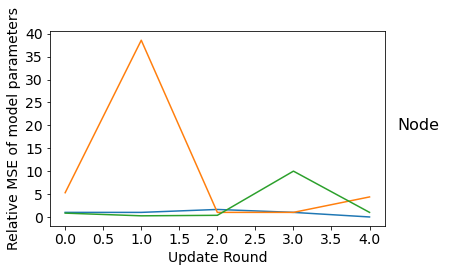

<Figure size 432x288 with 0 Axes>

In [58]:
import matplotlib.pyplot as plt
print("Result array")
print(array_relative_idea_4.shape) #wie geht das?
print(array_relative_idea_4)

# Plot Array with Accum mse 
    #PLOTS
for i in range(0, number_of_nodes):
    plt.plot(array_relative_idea_4[i])
    #TITLE
    #LABLE
plt.xlabel("Update Round", fontsize = 14)
plt.ylabel("Relative MSE of model parameters", fontsize = 14)
plt.ylim([0,0.0003])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.autoscale() 
    #LEGEND
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":14}, frameon = False, title='Node', title_fontsize=16)
    #GENERAL
plt.subplots_adjust(top=0.8)
#plt.savefig(lim_weights_second_relative_mse_graph, bbox_inches='tight',pad_inches=0.1)
plt.show()
plt.clf() # flushes plt


In [60]:
percentage_of_weights_concidered = 0.1
number_of_nodes = 3
number_of_weights_concidered = int(number_of_nodes * percentage_of_weights_concidered)
number_of_weights_concidered

0

In [150]:
weights = np.zeros((max_rounds, number_of_parameters))
weights[0][1] = 6
weights[2][4] = -2
weights[4][4] = 23
weights[2][4] = 4
weights[2][8] = 1
weights[2][7] = -14
weights[0][9] = 16
weights[2][0] = 18
weights[1][6] = 19
weights[0][1] = 20
weights[4][9] = 11
weights[3][1] = -12
weights[1][2] = 8
weights[1][4] = -27


print(weights.shape)
weights

(5, 10)


array([[  0.,  20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  16.],
       [  0.,   0.,   8.,   0., -27.,   0.,  19.,   0.,   0.,   0.],
       [ 18.,   0.,   0.,   0.,   4.,   0.,   0., -14.,   1.,   0.],
       [  0., -12.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  23.,   0.,   0.,   0.,   0.,  11.]])

In [153]:
indicies_larges_weights = np.zeros((5,4))
test1_indicies_larges_weights = np.zeros((5,4))

number_of_weights_concidered = 4
indicies_sorted = np.zeros((5,10))

In [154]:
# THINK ABOUT THIS MESS!!!! --> splitted for loop to make it easier

for row in range(len(weights)):
    #indicies_larges_weights[row] = save_all_means[row].argsort()[::-1][:number_of_weights_concidered] #note ::-1 means: starts from the end towards the first taking each element.
    #Maybe instead:
    indicies_sorted[row] = weights[row].argsort()[::-1]
    

In [159]:
for row in range(len(weights)):
    
    indicies_sorted[row] = weights[row].argsort()[::-1]

    beginning_counter = 0 
    end_counter = 10-1 # maybe -1 not sure?
    print(indicies_sorted[row])
    print(indicies_sorted[row][beginning_counter])
    print(weights[row][int(indicies_sorted[row][beginning_counter])])
    for i in range(0, number_of_weights_concidered):
        if(abs(weights[row][int(indicies_sorted[row][beginning_counter])]) > abs(weights[row][int(indicies_sorted[row][end_counter])])):
            indicies_larges_weights[row][i] = indicies_sorted[row][beginning_counter]
            beginning_counter += 1
        else:
            indicies_larges_weights[row][i] = indicies_sorted[row][end_counter]
            end_counter -= 1


[1. 9. 8. 7. 6. 5. 4. 3. 2. 0.]
1.0
20.0
[6. 2. 9. 8. 7. 5. 3. 1. 0. 4.]
6.0
19.0
[0. 4. 8. 9. 6. 5. 3. 2. 1. 7.]
0.0
18.0
[9. 8. 7. 6. 5. 4. 3. 2. 0. 1.]
9.0
0.0
[4. 9. 8. 7. 6. 5. 3. 2. 1. 0.]
4.0
23.0


In [160]:
indicies_larges_weights

array([[1., 9., 0., 2.],
       [4., 6., 2., 0.],
       [0., 7., 4., 8.],
       [1., 0., 2., 3.],
       [4., 9., 0., 1.]])

In [121]:
indicies_sorted

array([[0., 2., 3., 4., 5., 6., 7., 8., 9., 1.],
       [4., 0., 1., 3., 5., 7., 8., 9., 2., 6.],
       [7., 1., 2., 3., 5., 6., 9., 8., 4., 0.],
       [1., 0., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 5., 6., 7., 8., 9., 4.]])

In [120]:
indicies_larges_weights

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [117]:
for row in range(len(weights)):
    #indicies_larges_weights[row] = save_all_means[row].argsort()[::-1][:number_of_weights_concidered] #note ::-1 means: starts from the end towards the first taking each element.
    #Maybe instead:
    test1_indicies_larges_weights[row] = weights[row].argsort()[::-1][:4]

In [118]:
test1_indicies_larges_weights

array([[1., 9., 8., 7.],
       [6., 2., 9., 8.],
       [0., 4., 8., 9.],
       [9., 8., 7., 6.],
       [4., 9., 8., 7.]])